In [1]:
import sys
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('cardio_train.csv', delimiter=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
correlation = df.corr()
print(correlation ['cardio'].sort_values(ascending=False))

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


In [6]:
df['age'] = df['age'].apply(lambda x: x/365)
df['age'] = df['age'].apply(lambda x: int(x))
df['age'][:5]

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

In [7]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [10]:
cdf = df.drop(['gender','id','alco'], axis=1)
x= df.drop(['cardio','gender','id','alco'], axis=1)
y= df['cardio']


x.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,50,168,62.0,110,80,1,1,0,1
1,55,156,85.0,140,90,3,1,0,1
2,51,165,64.0,130,70,3,1,0,0
3,48,169,82.0,150,100,1,1,0,1
4,47,156,56.0,100,60,1,1,0,0


In [11]:
import seaborn as sns
sns.pairplot(cdf, hue='cardio')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027342123D90> (for post_execute):


KeyboardInterrupt: 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'weight'}>],
       [<AxesSubplot: title={'center': 'ap_hi'}>,
        <AxesSubplot: title={'center': 'ap_lo'}>,
        <AxesSubplot: title={'center': 'cholesterol'}>],
       [<AxesSubplot: title={'center': 'gluc'}>,
        <AxesSubplot: title={'center': 'smoke'}>,
        <AxesSubplot: title={'center': 'active'}>],
       [<AxesSubplot: title={'center': 'cardio'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

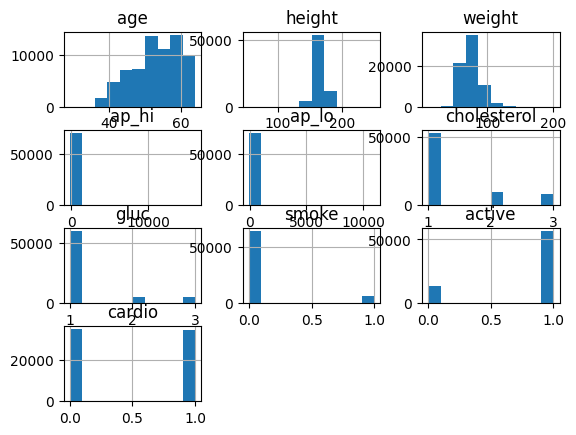

In [13]:
cdf.hist()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)



In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(x_train, y_train)
pred = model.predict(x_test)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)
print(cm)

[[5487 1517]
 [2153 4843]]


<AxesSubplot: >

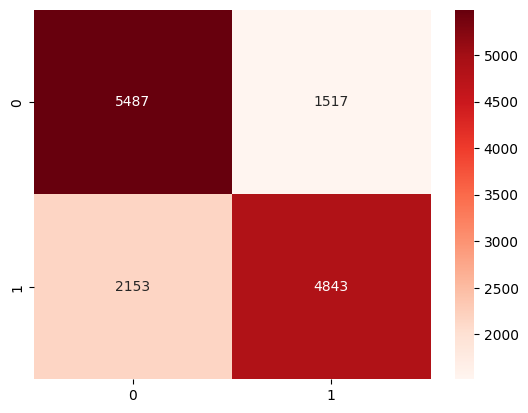

In [22]:
sns.heatmap(cm, annot=True, cmap='Reds', fmt= 'd')

In [25]:

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7004
           1       0.76      0.69      0.73      6996

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [28]:
pre_probability = model.predict_proba(x_test)
pre_probability[:10]

array([[0.07262415, 0.92737585],
       [0.17633355, 0.82366645],
       [0.16917568, 0.8308243 ],
       [0.21287894, 0.78712106],
       [0.7590637 , 0.24093625],
       [0.1283021 , 0.8716979 ],
       [0.09089875, 0.90910125],
       [0.16826177, 0.83173823],
       [0.45254874, 0.54745126],
       [0.42271668, 0.5772833 ]], dtype=float32)